https://algorithm.joho.info/programming/python/opencv-template-matching-sad-py/

### opencv

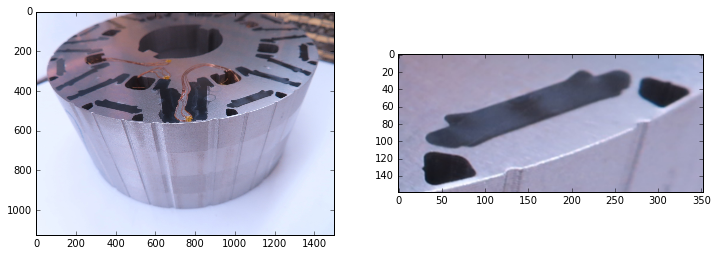

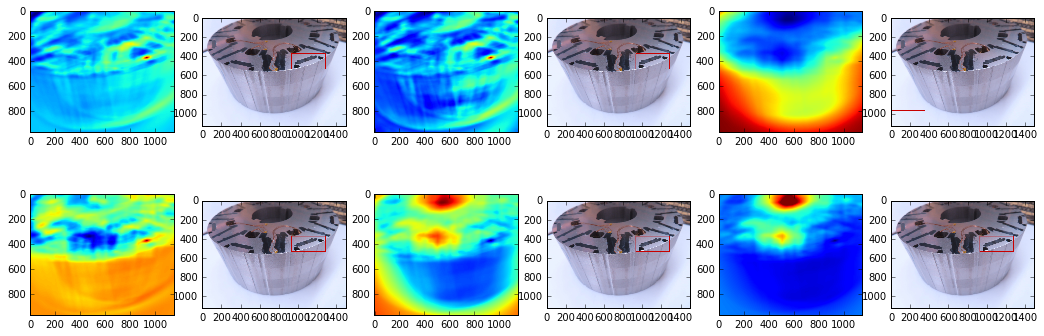

In [27]:
# -*- coding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np


# All the 6 methods for comparison in a list
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

# 入力画像とテンプレート画像をで取得
image = cv2.imread("image.png")
temp = cv2.imread("temp.png")

RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
temp_RGB = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)

# 先に元画像表示
fig1 = plt.figure(figsize=(12, 4))
ax1 = fig1.add_subplot(1, 2, 1)
ax1.imshow(RGB)
ax2 = fig1.add_subplot(1, 2, 2)
ax2.imshow(temp_RGB)

# グレースケール変換
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

ax = []
fig2 = plt.figure(figsize=(18, 6))
for i,method in enumerate(methods):
    test_image = image.copy()

    # テンプレート画像の高さ・幅
    h, w = temp.shape

    # テンプレートマッチング（OpenCVで実装）
    match = cv2.matchTemplate(gray, temp, method) #比較画像を生成(stride1の畳み込みと同じに縮小)
    min_value, max_value, min_pt, max_pt = cv2.minMaxLoc(match) #類似度最大/最小の値とそのピクセル値(元画像基準)
    if method == cv2.TM_SQDIFF or method == cv2.TM_SQDIFF_NORMED:
        pt = min_pt
    else:
        pt = max_pt

    # テンプレートマッチングの結果を出力
    cv2.rectangle(test_image, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0, 0, 200), 3)
    cv2.imwrite("result{}.png".format(i), test_image)
    result = cv2.imread("result{}.png".format(i))
    RGB_res = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    #結果画像の表示
    ax.append(fig2.add_subplot(2, len(methods), 2*i+1))
    ax.append(fig2.add_subplot(2, len(methods), 2*i+2))

    ax[2*i].imshow(match)
    ax[2*i+1].imshow(RGB_res)

### numpy

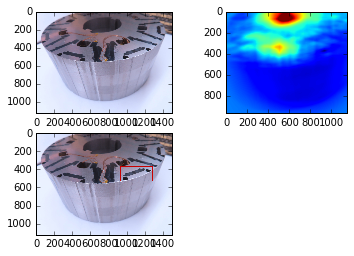

In [8]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np

def template_matching_sad(src, temp):
    # 画像の高さ・幅を取得
    h, w = src.shape
    ht, wt = temp.shape

    # スコア格納用の二次元配列
    score = np.empty((h-ht, w-wt))

    # 走査
    for dy in range(0, h - ht):
        for dx in range(0, w - wt):
            # 差分の絶対和を計算
            diff = np.abs(src[dy:(dy+ht), dx:(dx+wt)] - temp)
            score[dy, dx] = diff.sum()

    # スコアが最小の走査位置を返す
    pt = np.unravel_index(score.argmin(), score.shape)

    return (pt[1], pt[0])


# 入力画像の読み込み
image = cv2.imread("image.png")
temp = cv2.imread("temp.png")

RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# グレースケール変換
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

# テンプレート画像の高さ・幅
h, w = temp.shape

# テンプレートマッチング（NumPyで実装）
pt = template_matching_sad(gray, temp)

# テンプレートマッチングの結果を出力
cv2.rectangle(image, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0, 0, 200), 3)

# 結果を出力
cv2.imwrite("result2.png", image)
result = cv2.imread("result2.png")
RGB_res = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

#結果画像の表示
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.imshow(RGB)
ax2.imshow(match)
ax3.imshow(RGB_res)

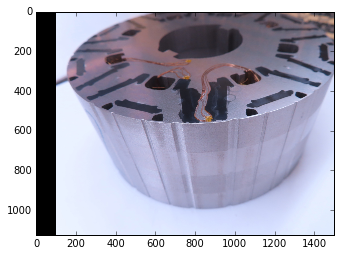

In [31]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

def shift_x(image, shift):
    h, w = image.shape[:2]
    src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
    dest = src.copy()
    dest[:,0] += shift # シフトするピクセル値
    affine = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(image, affine, (w, h))

shift = 100
src_image = cv2.imread('image.png')
shifted_image = shift_x(src_image, shift)
cv2.imwrite('shifted_image.png',shifted_image)
shifted_RGB = cv2.cvtColor(shifted_image, cv2.COLOR_BGR2RGB)
plt.imshow(shifted_RGB)

4
x変位： -100
y変位： 0
5
x変位： -100
y変位： 0
2
x変位： -100
y変位： 0
3
x変位： -100
y変位： 0
0
x変位： -100
y変位： 0
1


IndexError: list index out of range

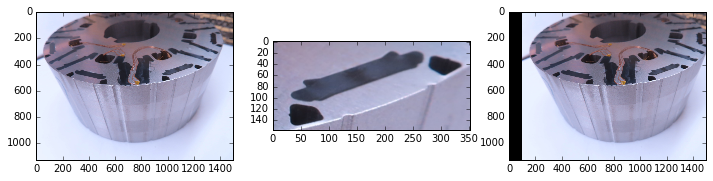

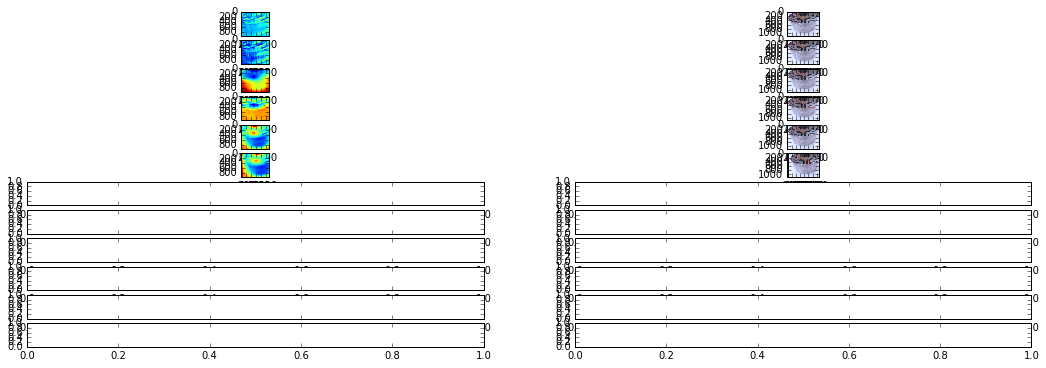

In [40]:
# -*- coding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np


# All the 6 methods for comparison in a list
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

# 入力画像とテンプレート画像をで取得
image = cv2.imread("image.png")
temp = cv2.imread("temp.png")
shifted_image = cv2.imread('shifted_image.png')

RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
temp_RGB = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
shifted_RGB = cv2.cvtColor(shifted_image, cv2.COLOR_BGR2RGB)

# 先に元画像表示
fig1 = plt.figure(figsize=(12, 4))
ax1 = fig1.add_subplot(1, 3, 1)
ax1.imshow(RGB)
ax2 = fig1.add_subplot(1, 3, 2)
ax2.imshow(temp_RGB)
ax3 = fig1.add_subplot(1, 3, 3)
ax3.imshow(shifted_RGB)

# グレースケール変換
gray_before = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_after = cv2.cvtColor(shifted_image, cv2.COLOR_RGB2GRAY)
temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

ax = []
fig2 = plt.figure(figsize=(18, 6))
point = []
for j in range(1,4*len(methods)+1):
    ax.append(fig2.add_subplot(12, 2, j))

for i,method in enumerate(methods):
    test_image_before = image.copy()
    test_image_after = shifted_image.copy()

    # テンプレート画像の高さ・幅
    h, w = temp.shape

    # テンプレートマッチング（OpenCVで実装）
    match_b = cv2.matchTemplate(gray_before, temp, method) #比較画像を生成(stride1の畳み込みと同じに縮小)
    min_value_b, max_value_b, min_pt_b, max_pt_b = cv2.minMaxLoc(match_b) #類似度最大/最小の値とそのピクセル値(元画像基準)
    match_a = cv2.matchTemplate(gray_after, temp, method) #比較画像を生成(stride1の畳み込みと同じに縮小)
    min_value_a, max_value_a, min_pt_a, max_pt_a = cv2.minMaxLoc(match_a) #類似度最大/最小の値とそのピクセル値(元画像基準)
    
    if method == cv2.TM_SQDIFF or method == cv2.TM_SQDIFF_NORMED:
        pt_b = min_pt_b
        pt_a = min_pt_a
    else:
        pt_b = max_pt_b
        pt_a = max_pt_a
        
    point.append([pt_b,pt_a])
    # テンプレートマッチングの結果を出力
    cv2.rectangle(test_image_before, (pt_b[0], pt_b[1]), (pt_b[0] + w, pt_b[1] + h), (0, 0, 200), 3)
    cv2.imwrite("result_b{}.png".format(i), test_image_before)
    result_b = cv2.imread("result_b{}.png".format(i))
    RGB_res_b = cv2.cvtColor(result_b, cv2.COLOR_BGR2RGB)
    
    cv2.rectangle(test_image_after, (pt_a[0], pt_a[1]), (pt_a[0] + w, pt_a[1] + h), (0, 0, 200), 3)
    cv2.imwrite("result_a{}.png".format(i), test_image_after)
    result_a = cv2.imread("result_a{}.png".format(i))
    RGB_res_a = cv2.cvtColor(result_a, cv2.COLOR_BGR2RGB)

    #結果画像の表示    
    ax[2*i].imshow(match_b)
    ax[2*i+1].imshow(RGB_res_b)
    ax[2*i+2].imshow(match_a)
    ax[2*i+3].imshow(RGB_res_a)
    if i == 4:
        break
for k,method in enumerate(methods):
    print(method)
    print('x変位：',point[k][0][0]-point[k][1][0])
    print('y変位：',point[k][0][1]-point[k][1][1])